<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Computer Vision Project Module
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import tensorflow as tf
print(tf.__version__) 
import cv2
from glob import glob
import warnings
warnings.filterwarnings("ignore")

2.12.0


# Part A

**DOMAIN:** Botanical Research

**CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.

**DATA DESCRIPTION:** The dataset comprises of images from 12 plant species. 
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

**PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo. 

# Steps and tasks:

#  Import and Understand the data

#  Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.


In [2]:
# Import ZipFile module
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "plant-seedlings-classification.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall('unzipped')
    print('Done!')
    


File Name                                             Modified             Size
plant-seedlings-classification/                2021-10-08 11:16:30            0
plant-seedlings-classification/.DS_Store       2021-10-08 11:16:36         6148
__MACOSX/plant-seedlings-classification/._.DS_Store 2021-10-08 11:16:36          120
plant-seedlings-classification/train/          2021-10-05 16:09:24            0
plant-seedlings-classification/train/Cleavers/ 2021-10-05 16:09:26            0
plant-seedlings-classification/train/.DS_Store 2021-10-06 16:30:12        10244
__MACOSX/plant-seedlings-classification/train/._.DS_Store 2021-10-06 16:30:12          120
plant-seedlings-classification/train/Sugar beet/ 2021-10-05 15:12:52            0
plant-seedlings-classification/train/Common Chickweed/ 2021-10-05 15:12:46            0
plant-seedlings-classification/train/Loose Silky-bent/ 2021-10-05 15:12:48            0
plant-seedlings-classification/train/Scentless Mayweed/ 2021-10-05 15:12:50           

plant-seedlings-classification/train/Loose Silky-bent/943edde10.png 2021-10-05 15:49:12        58450
plant-seedlings-classification/train/Loose Silky-bent/9b7799b3c.png 2021-10-05 15:49:12     20453543
plant-seedlings-classification/train/Loose Silky-bent/77b27933d.png 2021-10-05 15:49:12        15996
plant-seedlings-classification/train/Loose Silky-bent/e5fef8fc7.png 2021-10-05 15:49:14      1649028
plant-seedlings-classification/train/Loose Silky-bent/5dbd18569.png 2021-10-05 15:49:12         8084
plant-seedlings-classification/train/Loose Silky-bent/eda07616f.png 2021-10-05 15:49:14        45146
plant-seedlings-classification/train/Loose Silky-bent/9d1161173.png 2021-10-05 15:49:12        37184
plant-seedlings-classification/train/Loose Silky-bent/af355776d.png 2021-10-05 15:49:12       371264
plant-seedlings-classification/train/Loose Silky-bent/c5b5a2f6f.png 2021-10-05 15:49:14        56259
plant-seedlings-classification/train/Loose Silky-bent/4b7940ed6.png 2021-10-05 15:49:12    

plant-seedlings-classification/train/Scentless Mayweed/a06111202.png 2021-10-05 15:49:14       599431
plant-seedlings-classification/train/Scentless Mayweed/086894274.png 2021-10-05 15:49:14       218241
plant-seedlings-classification/train/Scentless Mayweed/025155400.png 2021-10-05 15:49:14        19192
plant-seedlings-classification/train/Scentless Mayweed/818952af9.png 2021-10-05 15:49:14        18496
plant-seedlings-classification/train/Scentless Mayweed/7d3b1def6.png 2021-10-05 15:49:14        39321
plant-seedlings-classification/train/Scentless Mayweed/d9ae7cf9d.png 2021-10-05 15:49:14        38897
plant-seedlings-classification/train/Scentless Mayweed/fb1ba1eb6.png 2021-10-05 15:49:16       318926
plant-seedlings-classification/train/Scentless Mayweed/7f3b7d37e.png 2021-10-05 15:49:14        31939
plant-seedlings-classification/train/Scentless Mayweed/628b08c82.png 2021-10-05 15:49:14        11996
plant-seedlings-classification/train/Scentless Mayweed/c4cfb9893.png 2021-10-05 15

plant-seedlings-classification/train/Small-flowered Cranesbill/789711110.png 2021-10-05 15:49:16       232816
plant-seedlings-classification/train/Small-flowered Cranesbill/fc0a3eeb0.png 2021-10-05 15:49:16        23968
plant-seedlings-classification/train/Small-flowered Cranesbill/e54767587.png 2021-10-05 15:49:16       596657
plant-seedlings-classification/train/Small-flowered Cranesbill/cf9ef8c5e.png 2021-10-05 15:49:16        30449
plant-seedlings-classification/train/Small-flowered Cranesbill/6d7fa83ff.png 2021-10-05 15:49:16       290387
plant-seedlings-classification/train/Small-flowered Cranesbill/feea57708.png 2021-10-05 15:49:16        34205
plant-seedlings-classification/train/Small-flowered Cranesbill/1f14ed265.png 2021-10-05 15:49:16       681122
plant-seedlings-classification/train/Small-flowered Cranesbill/0f2dbf503.png 2021-10-05 15:49:16        94618
plant-seedlings-classification/train/Small-flowered Cranesbill/869c32954.png 2021-10-05 15:49:16        72067
plant-seed

Done!


### Map the images from train folder with train labels to form a DataFrame.


In [3]:
import os
import cv2
import numpy as np
import pandas as pd

# Set the directory path
dir_path = 'C:/Users/ADMIN/Desktop/unzipped/plant-seedlings-classification/train/'

# Create an empty list to store the data
data = []

# Loop through each folder in the directory
for folder in os.listdir(dir_path):
    # Get the path of the folder
    folder_path = os.path.join(dir_path, folder)
    # Check if the folder is a valid directory
    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for img_name in os.listdir(folder_path):
            # Get the path of the image
            img_path = os.path.join(folder_path, img_name)
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            # Resize the image to a fixed size
            img = cv2.resize(img, (224, 224))
            # Append the image and label to the data list
            data.append((img, folder))

# Shuffle the data
np.random.shuffle(data)

# Split the data into X (images) and Y (labels)
X = np.array([i[0] for i in data])
Y = pd.DataFrame([i[1] for i in data], columns=['species'])

# Print the number of samples and classes
print('Number of samples:', len(X))
print('Number of classes:', len(Y['species'].unique()))


Number of samples: 4750
Number of classes: 12


In [4]:
# Check number of images in each folder/category
folders = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

dir_path = 'C:/Users/ADMIN/Desktop/unzipped/plant-seedlings-classification/' 
train_dir = os.path.join(dir_path, 'train')
for category in folders:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images


In [5]:
# Create dataframe
train = []
for category_id, category in enumerate(folders):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['Name of Image', 'Type of Image', 'Actual Image'])
train.head()

,Name of Image,Type of Image,Actual Image
0,train/Black-grass/0050f38b3.png,0,Black-grass
1,train/Black-grass/0183fdf68.png,0,Black-grass
2,train/Black-grass/0260cffa8.png,0,Black-grass
3,train/Black-grass/05eedce4d.png,0,Black-grass
4,train/Black-grass/075d004bc.png,0,Black-grass


## Write a function that will select n random images and display images along with its species.


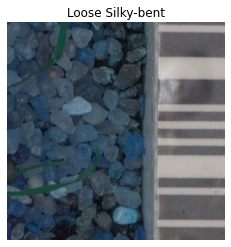

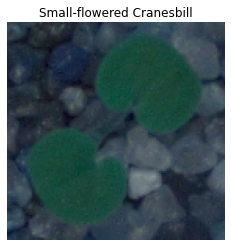

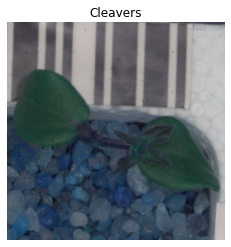

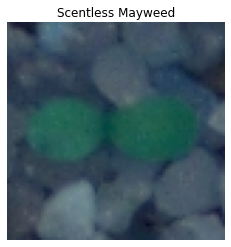

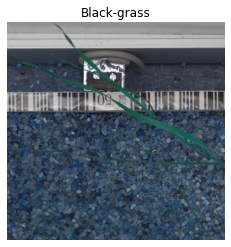

In [6]:
# Define Function
def PlotNRandomImages(N=5):
    temp = train.drop(['Type of Image'], axis=1)
    temp = temp.sample(N)
    temp = temp.values.tolist()
    
    for i, j in temp:
        plt.imshow(cv2.imread(dir_path+i));
        plt.title(j)
        plt.axis('off')
        plt.show()
    
# Call Function
PlotNRandomImages()

## Encode labels of the images.

In [7]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Create class instance
le = LabelEncoder()
le.fit(Y['species'])
encoded_labels = le.transform(Y['species'])
train_label = np_utils.to_categorical(encoded_labels) #Data type: Number to Binary

# Display encoded variable
train_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Unify shape of all the images.

**It is already dnoe in above code the images are unified as 224,224,3**

In [8]:
for i in range(1,len(X)):
    print(print(X[i].shape))

(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3

(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3

(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3

None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 2

None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 2

None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 224, 3)
None
(224, 2

### Normalise all the images.

In [9]:
# Convert list to array
X = np.asarray(X)

# Perform Normalization
X = X.astype('float32') / 255

# Display one normalized image
X[0]

array([[[0.29803923, 0.39215687, 0.4627451 ],
        [0.29411766, 0.4       , 0.48235294],
        [0.2784314 , 0.39215687, 0.4745098 ],
        ...,
        [0.24313726, 0.30588236, 0.3764706 ],
        [0.26666668, 0.33333334, 0.39607844],
        [0.28627452, 0.35686275, 0.41960785]],

       [[0.28627452, 0.3882353 , 0.4627451 ],
        [0.27450982, 0.39215687, 0.47843137],
        [0.25490198, 0.37254903, 0.46666667],
        ...,
        [0.2509804 , 0.30588236, 0.3764706 ],
        [0.25882354, 0.31764707, 0.38431373],
        [0.25490198, 0.30980393, 0.38039216]],

       [[0.26666668, 0.3764706 , 0.4509804 ],
        [0.2627451 , 0.38039216, 0.4627451 ],
        [0.24705882, 0.3647059 , 0.45490196],
        ...,
        [0.2627451 , 0.31764707, 0.38039216],
        [0.27058825, 0.32156864, 0.3882353 ],
        [0.2509804 , 0.3019608 , 0.37254903]],

       ...,

       [[0.28627452, 0.34509805, 0.36862746],
        [0.32941177, 0.39215687, 0.41568628],
        [0.28235295, 0

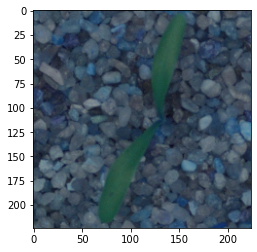

In [10]:
plt.imshow(X[0]);

# Model training

## Split the data into train and test data.

In [11]:
# Import Library
from sklearn.model_selection import train_test_split

# Use stratify option to overcome class imbalance problem
X_train,X_test,y_train,y_test=train_test_split(X, train_label,test_size=0.2, random_state=13, 
                                               stratify=train_label)

print(f"Shapes of Train & Test sets are: {X_train.shape},{X_test.shape}")

print(f"Shapes of Train & Test sets of Target are: {y_train.shape},{y_test.shape}")

Shapes of Train & Test sets are: (3800, 224, 224, 3),(950, 224, 224, 3)
Shapes of Train & Test sets of Target are: (3800, 12),(950, 12)


## Create new CNN architecture to train the model.

* Convolution layer (Conv2D) : Feauture detector(filter) ; detect elements in an image by element wise multiplication of matrices , use ReLU to break up linearity. Increase nonlinearity. because images are non linear.
* MaxPooling2D : extracting the most important parts of the data and increase processing efficiency faster by extracting only the maximum value of Grid and storing it in the output and it reduce the amount of parameters and computation in the network, and hence to also control overfitting.
* Dropout :  technique where randomly selected neurons are ignored during training , which helps prevent overfitting
* Flatten :  converts multi-dimensional matrix to single dimensional matrix. In Neural Network, non-linear function is used as activation function.
* Dense : used to classify image based on output from Convolutional layers


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(224, 224, 3), activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 218, 218, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 109, 109, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 109, 109, 64)      0         
                                                                 
 flatten (Flatten)           (None, 760384)            0

## Train the model on train data and validate on test data.

In [13]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, 
                  y_train, 
                  epochs = 15, 
                  validation_data = (X_test,y_test),
                  batch_size = 64)

Epoch 1/15
60/60 [==============================] - 917s 15s/step - loss: 2.4317 - accuracy: 0.2708 - val_loss: 4.0457 - val_accuracy: 0.0811
Epoch 2/15
60/60 [==============================] - 870s 14s/step - loss: 1.6128 - accuracy: 0.4700 - val_loss: 2.4348 - val_accuracy: 0.0884
Epoch 3/15
60/60 [==============================] - 873s 15s/step - loss: 1.2932 - accuracy: 0.5776 - val_loss: 2.2557 - val_accuracy: 0.2084
Epoch 4/15
60/60 [==============================] - 873s 15s/step - loss: 1.0332 - accuracy: 0.6674 - val_loss: 2.1051 - val_accuracy: 0.3232
Epoch 5/15
60/60 [==============================] - 880s 15s/step - loss: 0.8405 - accuracy: 0.7468 - val_loss: 2.0143 - val_accuracy: 0.3189
Epoch 6/15
60/60 [==============================] - 867s 14s/step - loss: 0.6532 - accuracy: 0.8034 - val_loss: 1.8562 - val_accuracy: 0.4179
Epoch 7/15
60/60 [==============================] - 868s 14s/step - loss: 0.5266 - accuracy: 0.8600 - val_loss: 1.9144 - val_accuracy: 0.3379
Epoch 

In [14]:
# Test Accuracy
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

30/30 [==============================] - 49s 2s/step - loss: 1.3640 - accuracy: 0.6063
Test loss: 1.36399507522583
Test accuracy: 0.6063157916069031


## Select a random image and print actual label and predicted label for the same. 

In [15]:
# Drop Unnecessary Column
#temp = train.drop(['Type of Image'], axis=1)

# Select 1 Random Image
temp = train.sample(1)

# Convert DataFrame to List
temp = temp.values.tolist()
    
# Select 1 Random Image for Prediction
for i, j, k in temp:
    print('Image Selected is: ',i)
    image_path = dir_path+i
    print('Image Path is: ',image_path)
    print('Type of Image is: ',j)
    print('Actual Image Name is: ',k)

Image Selected is:  train/Sugar beet/b98d35523.png
Image Path is:  C:/Users/ADMIN/Desktop/unzipped/plant-seedlings-classification/train/Sugar beet/b98d35523.png
Type of Image is:  11
Actual Image Name is:  Sugar beet


In [16]:
# Load the Image that has to be predicted
img_pred = cv2.imread(image_path)
img_pred_resize = cv2.resize(img_pred,(224,224),interpolation = cv2.INTER_CUBIC)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{img_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

The shape of image to be predicted is:'(626, 626, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 224, 224, 3)'


In [17]:
# Make Prediction with the best model
cnn_predict = np.argmax(model.predict(img_predict))

# Display prediction
print('The predicted panlt is with label:', cnn_predict)
print("Actual Label is: ",j)

1/1 [==============================] - 2s 2s/step
The predicted panlt is with label: 11
Actual Label is:  11
